# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
# Total number of unique Mouse IDs in the dataset
total_mice = merged_df["Mouse ID"].nunique()
print(f"Total number of unique mice: {total_mice}")


Total number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the duplicate entries
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice in the clean DataFrame.
# Get the ID of the duplicate mouse
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()[0]

# Drop all data associated with the duplicate mouse
cleaned_df = merged_df[merged_df["Mouse ID"] != duplicate_mouse_id]

# Verify the cleaned DataFrame
print(f"Number of unique mice after cleaning: {cleaned_df['Mouse ID'].nunique()}")


Number of unique mice after cleaning: 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_advanced = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

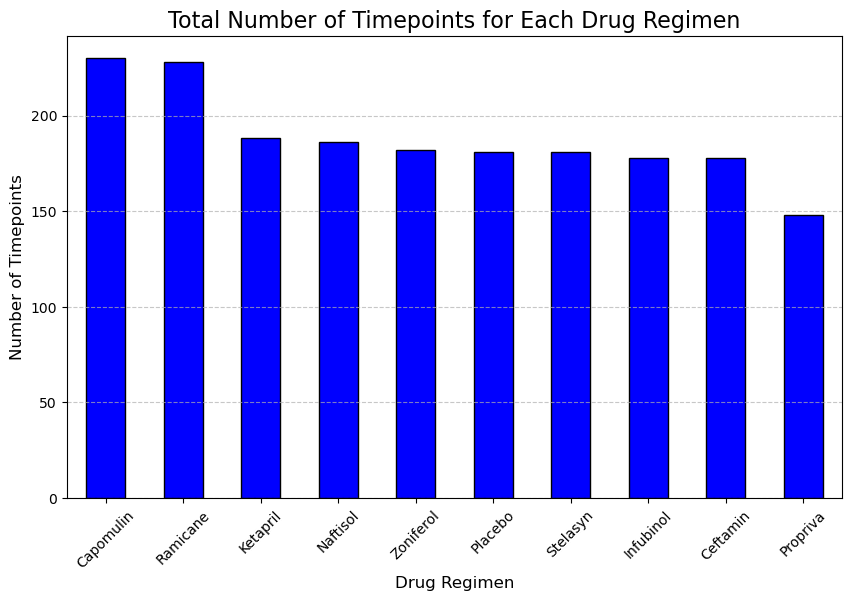

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_per_regimen = cleaned_df["Drug Regimen"].value_counts()

# Generate the bar plot
timepoints_per_regimen.plot(kind="bar", figsize=(10, 6), color="blue", edgecolor="black")

# Add plot details
plt.title("Total Number of Timepoints for Each Drug Regimen", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Timepoints", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


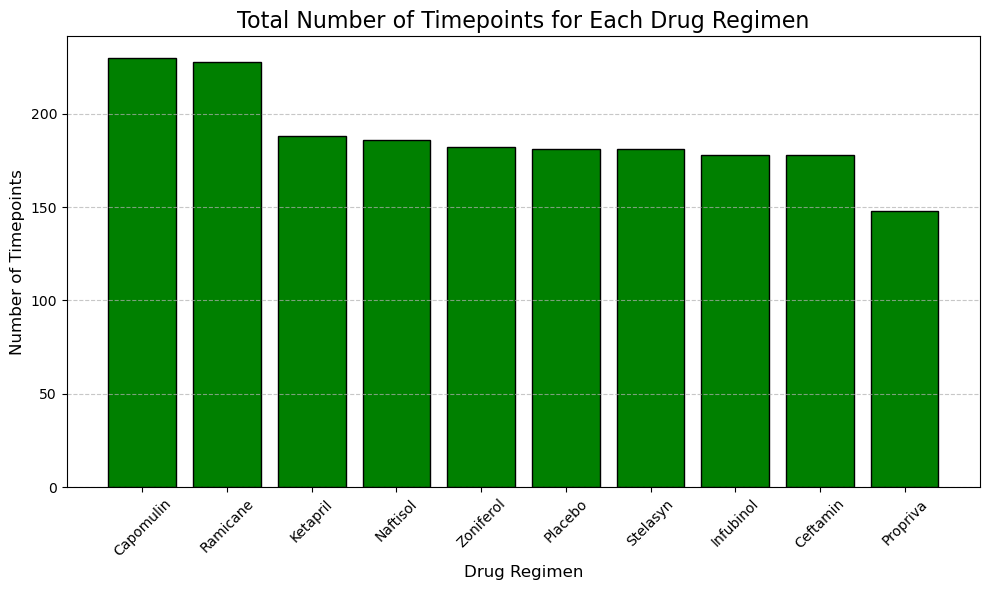

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoints_per_regimen = cleaned_df["Drug Regimen"].value_counts()

# Generate the bar plot
plt.figure(figsize=(10, 6))
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values, color="green", edgecolor="black")

# Add plot details
plt.title("Total Number of Timepoints for Each Drug Regimen", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Timepoints", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


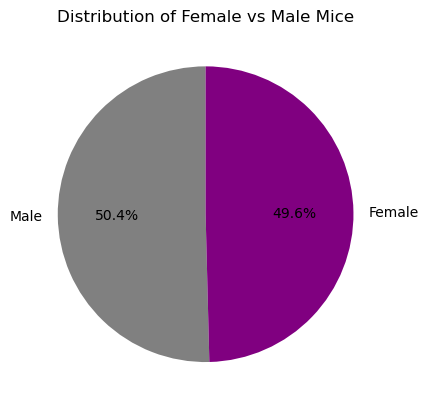

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_df.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart
gender_distribution.plot.pie(
    autopct="%1.1f%%", 
    startangle=90, 
    title="Distribution of Female vs Male Mice", 
    ylabel="",
    colors=["grey", "purple"]
)

# Show the plot
plt.show()


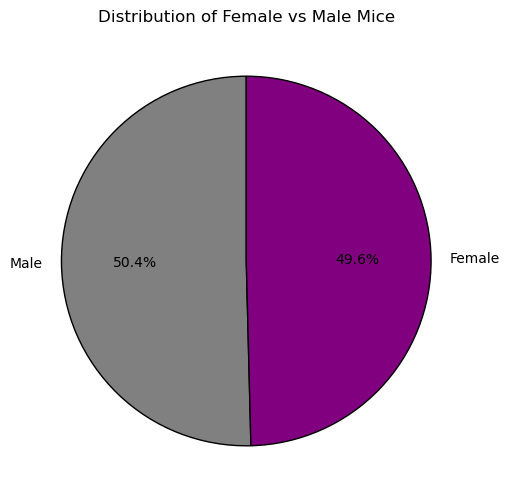

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = cleaned_df.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,  # Gender labels
    autopct="%1.1f%%",  # Show percentages
    startangle=90,  # Rotate the pie chart for better orientation
    colors=["grey", "purple"],  # Custom colors for slices
    wedgeprops={"edgecolor": "black"}  # Add edge to wedges for aesthetics
)

# Add a title
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"], how="left")

# Filter the merged DataFrame to include only rows for the selected treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = merged_df[merged_df["Drug Regimen"].isin(treatments)]

# Display the resulting DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{drug}:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Potential outliers: {outliers.tolist()}\n")


Capomulin:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: []

Ramicane:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: []

Infubinol:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: [36.3213458]

Ceftamin:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: []



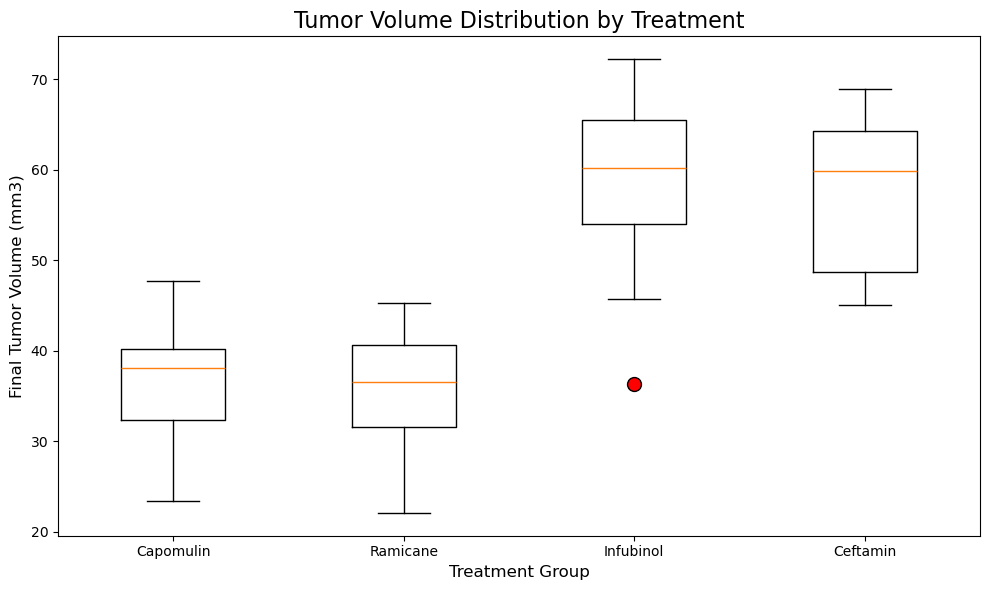

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the tumor volume data for each treatment
ax.boxplot(tumor_vol_data, labels=treatments, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10, "linestyle": "none"})

# Add a title, x-axis label, and y-axis label
ax.set_title("Tumor Volume Distribution by Treatment", fontsize=16)
ax.set_xlabel("Treatment Group", fontsize=12)
ax.set_ylabel("Final Tumor Volume (mm3)", fontsize=12)

# Display the box plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

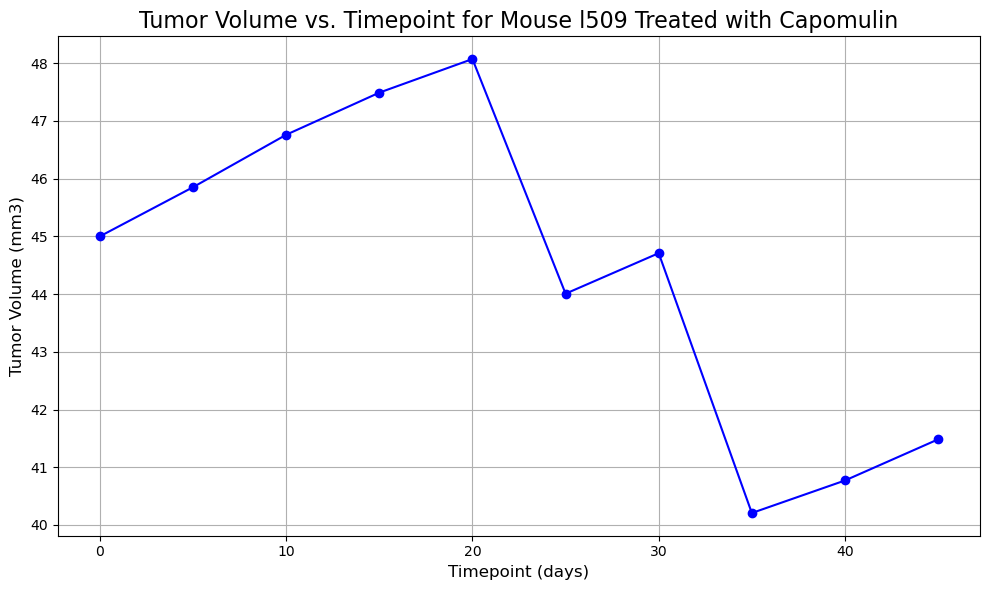

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
capomulin_mouse_data = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509")]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o', linestyle='-', color='b')

# Add a title, x-axis label, and y-axis label
plt.title("Tumor Volume vs. Timepoint for Mouse l509 Treated with Capomulin", fontsize=16)
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# Display the line plot
plt.grid(True)
plt.tight_layout()
plt.show()


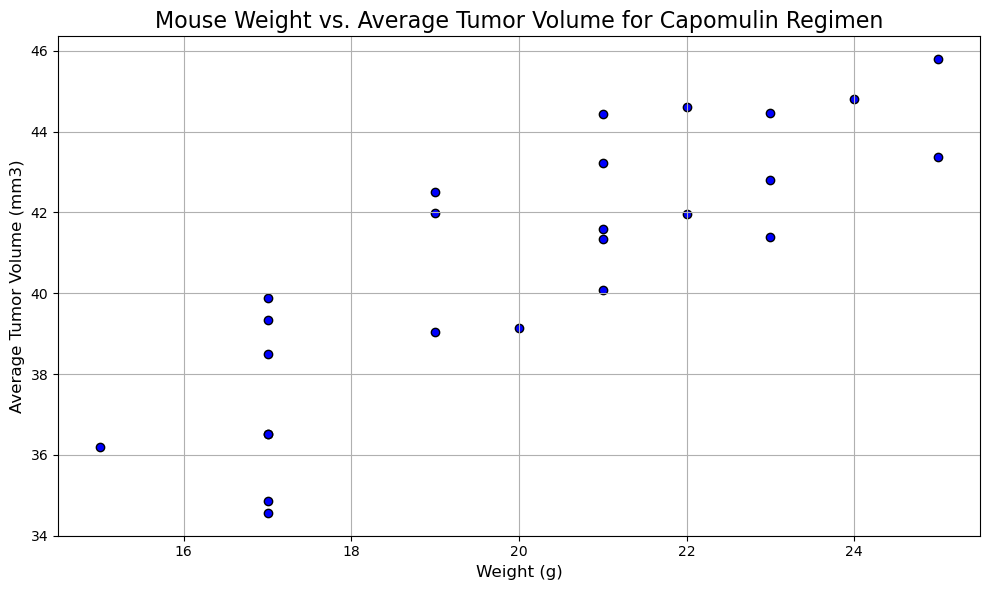

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Extract the corresponding mouse weight for each mouse
capomulin_mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, color='blue', edgecolor='black')

# Add a title, x-axis label, and y-axis label
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=16)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Display the scatter plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


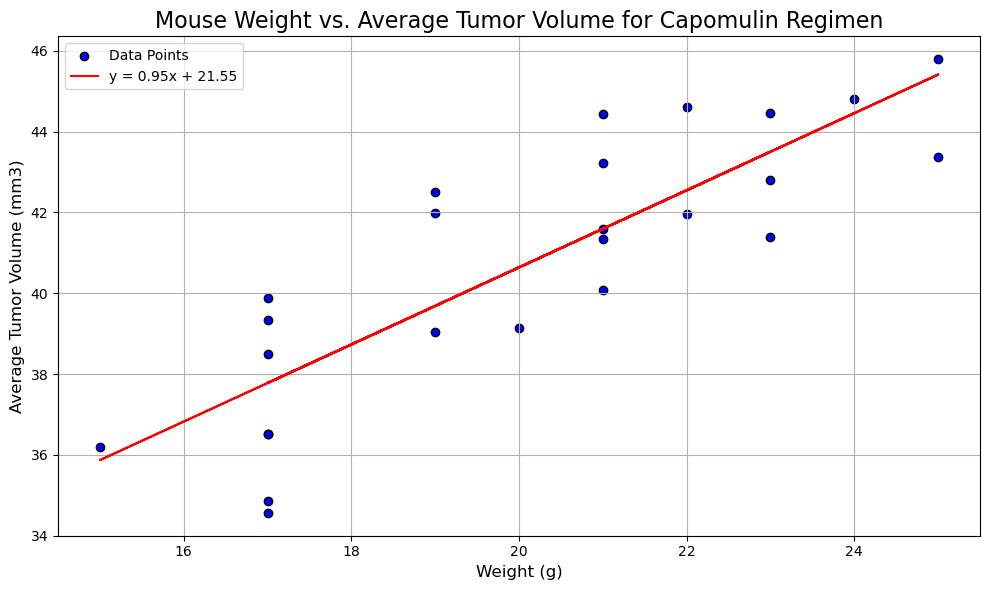

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)

# Calculate the correlation coefficient
correlation_coefficient = capomulin_mouse_weight.corr(capomulin_avg_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, color='blue', edgecolor='black', label="Data Points")

# Plot the linear regression line
regression_values = slope * capomulin_mouse_weight + intercept
plt.plot(capomulin_mouse_weight, regression_values, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")

# Add a title, x-axis label, and y-axis label
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen", fontsize=16)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Add legend
plt.legend()

# Display the scatter plot with regression line
plt.grid(True)
plt.tight_layout()
plt.show()
